In [2]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlibe inline

UsageError: Line magic function `%matplotlibe` not found.


In [1]:
words = open('names.txt', 'r').read().splitlines()
words[:8]

['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia']

In [3]:
len(words)

32033

In [6]:
# build the vocabulary of characters and mappings to/from integers
chars = sorted(list(set(''.join(words))))
stoi = {s:i+1 for i, s in enumerate(chars)}
stoi['.'] = 0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


In [129]:
# create dataset

block_size = 3 #context length: How many characters do we take to predict the next one?
X, Y = [], []
for w in words:
    #print(w)
    context = [0] * block_size #padded context of [0,0,0]
    for ch in w + '.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        #print(''.join(itos[i] for i in context), '---->', itos[ix])
        context = context[1:] + [ix] # crop and append => 'rolling window of context'

X = torch.tensor(X)
Y = torch.tensor(Y)

In [130]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([228146, 3]), torch.int64, torch.Size([228146]), torch.int64)

In [11]:
C = torch.randn((27,2))

In [12]:
C[5]

tensor([-0.0115,  0.0211])

In [13]:
F.one_hot(torch.tensor(5), num_classes=27).float() @ C

tensor([-0.0115,  0.0211])

In [19]:
emb = C[X]
emb.shape

torch.Size([32, 3, 2])

In [17]:
W1 = torch.randn((6,100))
b1 = torch.randn(100)

In [24]:
torch.cat([emb[:, 0, :], emb[:, 1, :], emb[:,2,:]], 1).shape

torch.Size([32, 6])

In [27]:
torch.cat(torch.unbind(emb, 1),1).shape

torch.Size([32, 6])

In [28]:
a =torch.arange(18)
a

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

In [29]:
a.shape

torch.Size([18])

In [31]:
a.view(9,2)
a.view(3,3,2)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])

In [34]:
emb.view(32,6) == torch.cat(torch.unbind(emb, 1),1)

tensor([[True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, True, True],
        [True, True, True, True, T

In [38]:
h = emb.view(emb.shape[0],6) @ W1 + b1
h = torch.tanh(h)
h

tensor([[-0.9878, -0.4107,  0.9410,  ..., -0.9576,  0.6927,  0.9979],
        [-0.9639, -0.6006,  0.9468,  ..., -0.8197,  0.6882,  0.9923],
        [-0.8818, -0.2964,  0.2304,  ..., -0.8179, -0.1887,  0.6104],
        ...,
        [-0.8132,  0.2891,  0.7374,  ..., -0.9940,  0.3476,  1.0000],
        [-0.9971, -0.1454,  0.9714,  ...,  0.4036,  0.5596,  1.0000],
        [-0.9927, -0.0700, -0.7892,  ...,  0.1706, -0.9171, -0.9957]])

In [39]:
h.shape

torch.Size([32, 100])

In [40]:
W2 = torch.randn((100, 27))
b2 = torch.randn(27)
logits = h @ W2 + b2

In [41]:
logits.shape

torch.Size([32, 27])

In [43]:
counts = logits.exp()

In [44]:
prob = counts / counts.sum(1, keepdims=True)

In [45]:
prob.shape

torch.Size([32, 27])

In [46]:
prob[0].sum()

tensor(1.)

In [49]:
loss = -prob[torch.arange(32), Y].log().mean()

In [50]:
loss

tensor(16.7671)

# Reorganizing it:

In [218]:
X.shape, Y.shape

(torch.Size([228146, 3]), torch.Size([228146]))

In [190]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 2), generator=g)
W1 = torch.randn((6,100), generator=g) # 100 is the number of neurons as a hyperparameter; 6 because we have 3 neurons with 2 Dimensions
b1 = torch.randn(100, generator=g)
W2 = torch.randn((100, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

In [191]:
sum(p.nelement() for p in parameters)

3481

In [192]:
for p in parameters:
    p.requires_grad = True

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

In [203]:
lri = []
lossi = []
for i in range(10000):

    #minibatch construction
    ix = torch.randint(0, X.shape[0], (32,))


    # forward pass
    emb = C[X[ix]] #[32, 3, 2]
    h = torch.tanh(emb.view(-1, 6) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2 
    # counts = logits.exp() # high logits might lead to an exploding exponent so subtracting the highes from all might be beneficial. Cross entropy does this automatically
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32)].log().mean()
    loss = F.cross_entropy(logits, Y[ix]) 
    #print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        #lr = lrs[i]
        lr = 0.01
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    #lossi.append(loss.item())
print(loss.item())


2.181767702102661


In [206]:
emb = C[X] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 6) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Y)
loss

tensor(2.2977, grad_fn=<NllLossBackward0>)

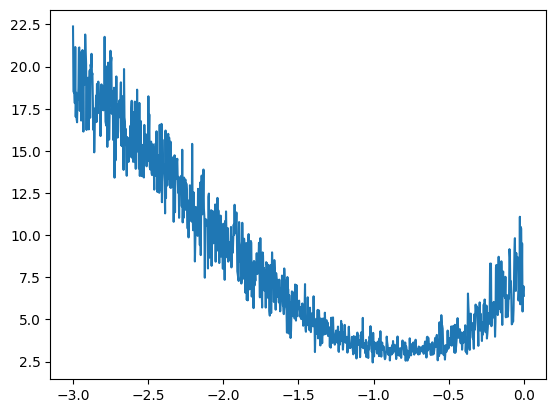

In [185]:
plt.plot(lri, lossi)

In [137]:
torch.randint(0, X.shape[0], (32,))

tensor([ 77276,  86886,  11512,  18514,  36607,   9007, 193605, 107811,  57891,
        125622, 184812, 112927,  50396,  90734,  21699, 130748,  71780,   2682,
        126233, 110885,   9647,  94676, 166969,  66328, 123264, 226662, 120101,
        177762, 210990, 108294, 219236,  38054])

# Now make use of Train, Validation and Test splits

In [216]:
#build the datasets

def build_dataset(words):
    block_size = 3
    X, Y = [], []
    for w in words:
        context = [0] * block_size
        for ch in w + '.':
            ix = stoi[ch]
            X.append(context)
            Y.append(ix)
            context = context[1:] + [ix]
    X = torch.tensor(X)
    Y = torch.tensor(Y)
    print(X.shape, Y.shape)
    return X, Y

import random
random.seed(42)
random.shuffle(words)
n1 = int(0.8 * len(words))
n2 = int(0.9 * len(words))

Xtr, Ytr = build_dataset(words[:n1])
Xdev, Ydev = build_dataset(words[n1:n2])
Xtest, Ytest = build_dataset(words[n2:])


torch.Size([182437, 3]) torch.Size([182437])
torch.Size([22781, 3]) torch.Size([22781])
torch.Size([22928, 3]) torch.Size([22928])


In [219]:
Xtr.shape, Ytr.shape

(torch.Size([182437, 3]), torch.Size([182437]))

In [303]:
g = torch.Generator().manual_seed(2147483647) # for reproducibility
C = torch.randn((27, 10), generator=g) #10 = dimensionality of the embeddings
W1 = torch.randn((30, 200), generator=g)
b1 = torch.randn(200, generator=g)
W2 = torch.randn((200, 27), generator=g)
b2 = torch.randn(27, generator=g)
parameters = [C, W1, b1, W2, b2]

for p in parameters:
  p.requires_grad = True

In [304]:
sum(p.nelement() for p in parameters)

11897

In [ ]:
lre = torch.linspace(-3, 0, 1000)
lrs = 10**lre
lrs

In [306]:
lri = []
lossi = []
stepi = []

In [307]:
for step in range(200000):

    #minibatch construction
    ix = torch.randint(0, Xtr.shape[0], (64,))


    # forward pass
    emb = C[Xtr[ix]] #[32, 3, 2]
    h = torch.tanh(emb.view(-1, 30) @ W1 + b1) #(32, 100)
    logits = h @ W2 + b2 
    # counts = logits.exp() # high logits might lead to an exploding exponent so subtracting the highes from all might be beneficial. Cross entropy does this automatically
    # prob = counts / counts.sum(1, keepdims=True)
    # loss = -prob[torch.arange(32)].log().mean()
    loss = F.cross_entropy(logits, Ytr[ix]) 
    #print(loss.item())
    for p in parameters:
        p.grad = None
    loss.backward()
    #update
    for p in parameters:
        #lr = lrs[i]
        lr = 0.1 if step < 100000 else 0.01
        p.data += -lr * p.grad

    # track stats
    #lri.append(lre[i])
    stepi.append(step)
    lossi.append(loss.log10().item())
print(loss.item())

2.289311170578003


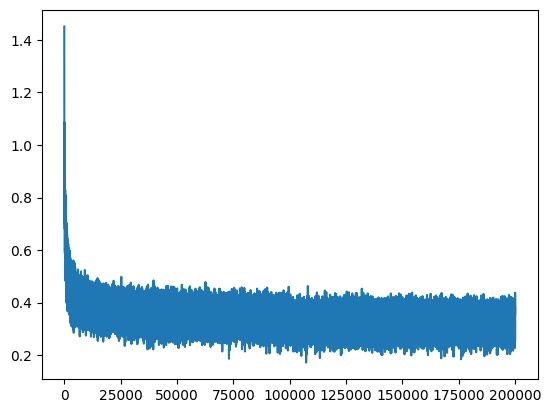

In [313]:
plt.plot(stepi, lossi)

In [308]:
emb = C[Xtr] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ytr)
loss

tensor(2.1205, grad_fn=<NllLossBackward0>)

In [309]:
emb = C[Xdev] # (32, 3, 2)
h = torch.tanh(emb.view(-1, 30) @ W1 + b1) # (32, 100)
logits = h @ W2 + b2 # (32, 27)
loss = F.cross_entropy(logits, Ydev)
loss

tensor(2.1746, grad_fn=<NllLossBackward0>)

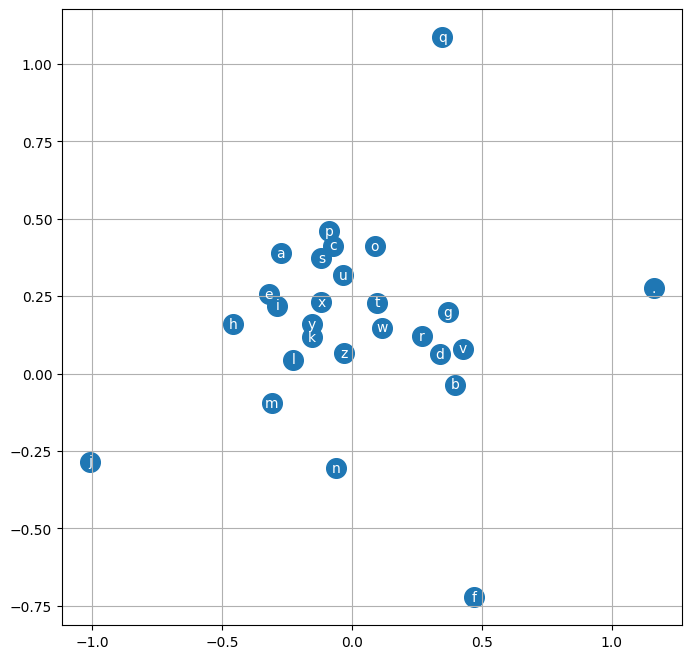

In [310]:
plt.figure(figsize=(8,8))
plt.scatter(C[:,0].data, C[:,1].data, s=200)
for i in range(C.shape[0]):
    plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha="center", va="center", color="white")
    plt.grid('minor')

# Sample from the model

In [311]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 10])

In [312]:
# sample from the model
g = torch.Generator().manual_seed(2147483647 + 10)

for _ in range(20):
    
    out = []
    context = [0] * block_size # initialize with all ...
    while True:
      emb = C[torch.tensor([context])] # (1,block_size,d)
      h = torch.tanh(emb.view(1, -1) @ W1 + b1)
      logits = h @ W2 + b2
      probs = F.softmax(logits, dim=1)
      ix = torch.multinomial(probs, num_samples=1, generator=g).item()
      context = context[1:] + [ix]
      out.append(ix)
      if ix == 0:
        break
    
    print(''.join(itos[i] for i in out))

mora.
mayah.
see.
madhoyah.
remmre.
ej.
ramira.
chedielin.
shi.
jenreden.
estanarielleima.
kamin.
shravigahimiel.
kindreelle.
jetton.
kubalynd.
ryyah.
faeha.
kaysh.
skolanihia.
